## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Atribuindo o dataset a uma variável

In [2]:
df = pd.read_csv('DesafioEstagioMachineLearning.csv')

### As primeiras cinco linhas do data frame

In [3]:
df.head()

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,...,0,145,715,1242,1093,758,92,304,2501.0,932515.0
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,...,0,0,82,506,2040,2490,827,2506,931.0,588833.0
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,...,0,96,404,652,644,522,77,254,2391.0,874200.0
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,...,114,178,393,517,945,584,137,286,3727.0,912226.0
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,...,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0


### Todas as colunas 

In [4]:
df.columns

Index(['codigo', 'nome', 'cidade', 'estado', 'população', 'popAte9',
       'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49',
       'popDe50a59', 'popMaisDe60', 'domiciliosA1', 'domiciliosA2',
       'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2',
       'domiciliosD', 'domiciliosE', 'rendaMedia', 'faturamento'],
      dtype='object')

### Tipos dos atributos
#### Momento muito importante para identificar logo de começo algum possível atributo que está com um tipo de variável diferente do previsto para ser manipulado lá na frente
#### Aparentemente está tudo ok, não vamos precisar realizar nenhuma alteração

In [5]:
df.dtypes

codigo            int64
nome             object
cidade           object
estado           object
população         int64
popAte9           int64
popDe10a14        int64
popDe15a19        int64
popDe20a24        int64
popDe25a34        int64
popDe35a49        int64
popDe50a59        int64
popMaisDe60       int64
domiciliosA1      int64
domiciliosA2      int64
domiciliosB1      int64
domiciliosB2      int64
domiciliosC1      int64
domiciliosC2      int64
domiciliosD       int64
domiciliosE       int64
rendaMedia      float64
faturamento     float64
dtype: object

### Gerando as estatísticas descritivas
#### Obs: Implementei uma função **lambda** para tirar a notação científica dos valores
#### O valor que aparece como desvio padrão da renda média é suspeito 🤔

In [6]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df.describe()

,codigo,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
count,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,154.0,160.0
mean,3304557080.5,42654.3,5329.1,2484.4,3272.2,3349.4,6584.5,8826.9,5332.3,7475.7,388.5,608.3,1871.6,2385.1,3539.8,3030.8,568.4,1821.6,3608.1,876160.0
std,46.3,64262.9,10816.2,4948.8,5752.2,5601.9,9049.9,11536.3,7986.3,10258.3,1403.6,1535.2,2973.5,2779.1,4324.5,4003.0,823.9,2292.1,6091.9,438210.6
min,3304557001.0,173.0,33.0,13.0,22.0,17.0,28.0,38.0,10.0,12.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,2.0,654.0,24651.0
25%,3304557040.8,13362.8,1512.8,690.8,945.0,994.8,2131.2,2900.8,1598.8,2118.2,0.0,0.0,391.5,716.0,1088.8,789.8,117.8,431.5,1486.0,711278.5
50%,3304557080.5,26076.0,3111.5,1434.0,2015.0,2142.5,4170.5,5657.0,3371.5,4575.5,0.0,107.5,848.0,1536.0,2394.5,1861.5,327.5,1042.5,1915.5,824228.5
75%,3304557120.2,46504.5,5622.2,2621.5,3448.8,3451.8,7145.2,9586.8,6333.2,9196.0,1.0,430.5,1962.5,3065.8,4203.0,3652.5,694.0,2138.2,2954.5,934320.8
max,3304557160.0,667603.0,122578.0,55935.0,62342.0,60567.0,86116.0,105316.0,83341.0,91408.0,13408.0,11668.0,19350.0,21237.0,33111.0,25779.0,4956.0,14833.0,63887.0,2915612.0


### Verificando a existência de campos **nulos**
#### Antes de mais nada, precisamos saber se existem campos nulos, para não causar problemas futuros no momento de criar nosso **modelo**
#### Irei imprimir todos, já fazendo a **soma**

In [7]:
df.isnull().sum()

codigo          0
nome            0
cidade          0
estado          0
população       0
popAte9         0
popDe10a14      0
popDe15a19      0
popDe20a24      0
popDe25a34      0
popDe35a49      0
popDe50a59      0
popMaisDe60     0
domiciliosA1    0
domiciliosA2    0
domiciliosB1    0
domiciliosB2    0
domiciliosC1    0
domiciliosC2    0
domiciliosD     0
domiciliosE     0
rendaMedia      6
faturamento     0
dtype: int64

### Por ser apenas seis linhas de uma única coluna, não iremos fazer algo radical. 
#### Uma de duas possíveis soluções acredito que sejam o suficiente, adicionar a média ou mediana da coluna para preencher esses campos nulos. Nesse caso eu irei optar pela mediana, já que a média poderia acabar agregando uma renda média muito maior do que o bairro teria.

In [8]:
renda_media_mediana = df['rendaMedia'].median()
df.fillna(renda_media_mediana, inplace=True)

### Confirmando o preenchimento da mediana nas linhas nulas
#### Check ✅

In [9]:
df.isnull().sum()

codigo          0
nome            0
cidade          0
estado          0
população       0
popAte9         0
popDe10a14      0
popDe15a19      0
popDe20a24      0
popDe25a34      0
popDe35a49      0
popDe50a59      0
popMaisDe60     0
domiciliosA1    0
domiciliosA2    0
domiciliosB1    0
domiciliosB2    0
domiciliosC1    0
domiciliosC2    0
domiciliosD     0
domiciliosE     0
rendaMedia      0
faturamento     0
dtype: int64

### Dando continuidade, vamos descobrir quais são os bairros mais populosos do RJ
#### Os **10** mais populosos, em ordem **decrescente**

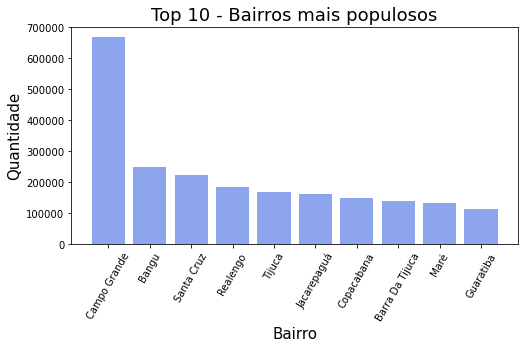

In [10]:
df_pop_sort_desc = df[['nome', 'população']].sort_values('população',ascending=False).head(10)
plt.figure(figsize=(8,4))
plt.bar('nome', 'população',data=df_pop_sort_desc, alpha=.6, color='royalblue')
plt.xlabel('Bairro', size=15)
plt.ylabel('Quantidade', size=15)
plt.title('Top 10 - Bairros mais populosos', size=18)
plt.xticks(rotation=60);

#### Números exatos da população dos bairros selecionados

In [11]:
df_pop_sort_desc

,nome,população
23,Campo Grande,667603
8,Bangu,249987
127,Santa Cruz,223440
117,Realengo,185206
141,Tijuca,168267
72,Jacarepaguá,161748
36,Copacabana,150524
9,Barra Da Tijuca,139761
90,Maré,133432
62,Guaratiba,112994


### Gráficos dos principais bairros com a maior quantidade de domicilios **A1, A2, B1 e B2**, respectivamente
#### Os **10** mais populosos por categoria. Segue a lista!
## **A1**

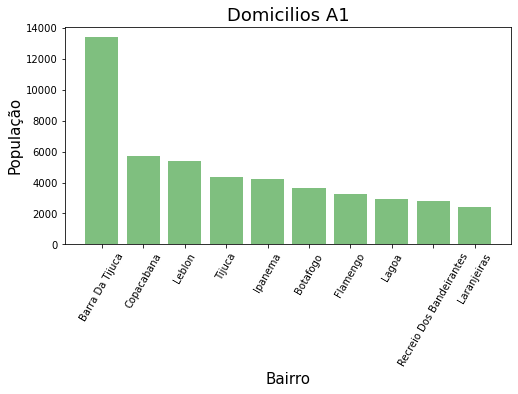

In [12]:
df_domA1_sort_desc = df[['nome','domiciliosA1']].sort_values('domiciliosA1', ascending=False).head(10)
plt.figure(figsize=(8,4))
plt.bar('nome', 'domiciliosA1', data=df_domA1_sort_desc, alpha=.5, color='green')
plt.xlabel('Bairro', size=15)
plt.ylabel('População', size=15)
plt.title('Domicilios A1', size=18)
plt.xticks(rotation=60);

## **A2**

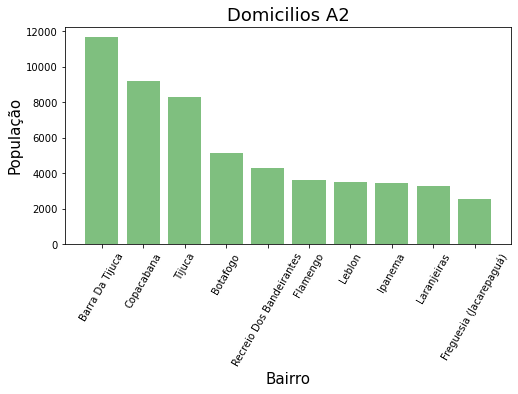

In [13]:
df_domA2_sort_desc = df[['nome','domiciliosA2']].sort_values('domiciliosA2', ascending=False).head(10)
plt.figure(figsize=(8,4))
plt.bar('nome', 'domiciliosA2', data=df_domA2_sort_desc, alpha=.5, color='green')
plt.xlabel('Bairro', size=15)
plt.ylabel('População', size=15)
plt.title('Domicilios A2', size=18)
plt.xticks(rotation=60);

## **B1**

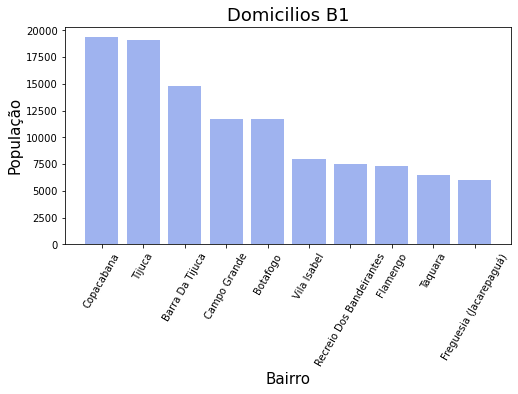

In [14]:
df_domB1_sort_desc = df[['nome','domiciliosB1']].sort_values('domiciliosB1', ascending=False).head(10)
plt.figure(figsize=(8,4))
plt.bar('nome', 'domiciliosB1', data=df_domB1_sort_desc, alpha=.5, color='royalblue')
plt.xlabel('Bairro', size=15)
plt.ylabel('População', size=15)
plt.title('Domicilios B1', size=18)
plt.xticks(rotation=60);

## **B2**

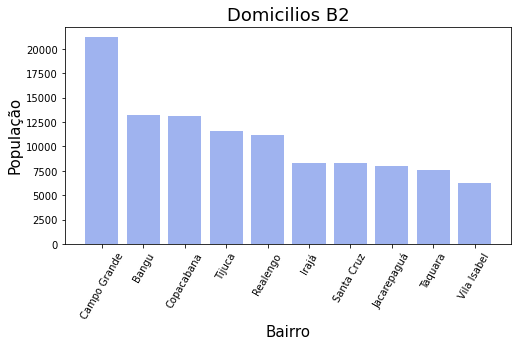

In [15]:
df_domB2_sort_desc = df[['nome','domiciliosB2']].sort_values('domiciliosB2', ascending=False).head(10)
plt.figure(figsize=(8,4))
plt.bar('nome', 'domiciliosB2', data=df_domB2_sort_desc, alpha=.5, color='royalblue')
plt.xlabel('Bairro', size=15)
plt.ylabel('População', size=15)
plt.title('Domicilios B2', size=18)
plt.xticks(rotation=60);

### Os bairros que mais faturam
#### Apenas os **10** bairros mais rentáveis 📊

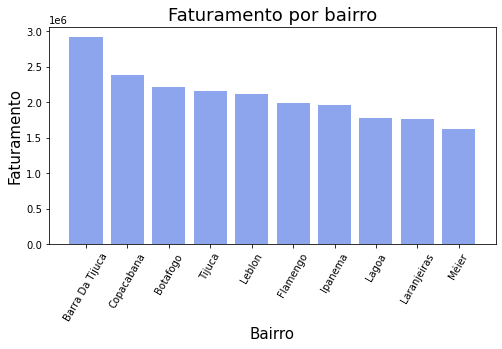

In [16]:
df_fat_sort_desc = df[['nome','faturamento']].sort_values('faturamento', ascending=False).head(10)
plt.figure(figsize=(8, 4))
plt.bar('nome', 'faturamento',data= df_fat_sort_desc, alpha=.6, color="royalblue")
plt.xlabel("Bairro", size=15)
plt.ylabel("Faturamento", size=15)
plt.title("Faturamento por bairro", size=18)
plt.xticks(rotation=60);

### Os bairros com as maiores rendas médias
#### Esse gráfico é muito interessante pelo seguinte fato, o bairro **Lagoa** não é o que mais fatura, inclusive nem está entre os top 7, porém a renda média é 3x maior do que qualquer outro bairro do dataset. Suspeito né?! Exatamente de acordo com o desvio padrão que vimos lá em cima 🤔

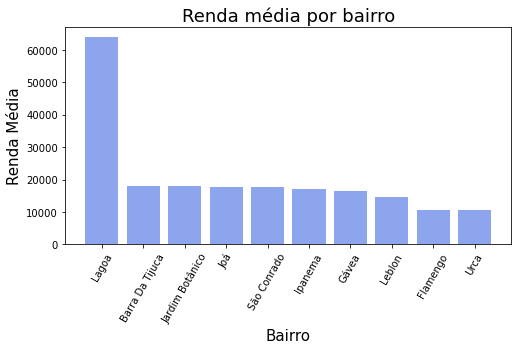

In [17]:
df_rm_sort_desc = df[['nome','rendaMedia']].sort_values('rendaMedia', ascending=False).head(10)
plt.figure(figsize=(8, 4))
plt.bar('nome', 'rendaMedia',data= df_rm_sort_desc, alpha=.6, color="royalblue")
plt.xlabel("Bairro", size=15)
plt.ylabel("Renda Média", size=15)
plt.title("Renda média por bairro", size=18)
plt.xticks(rotation=60);

### Olha... cheguei a conclusão que o valor de **63.887** que o bairro **Lagoa** tem como **renda média** é um erro.
#### Em certo momento até cheguei a pensar que fosse um **outlider**, mas não, é um erro. Nem os bairros que mais faturam chegam perto de ter renda média tão disproporcional quanto esta. Analisei o dataset com calma, comparei os atributos de **Lagoa** com outros bairros.
#### O provável erro que eu acredito que tenha acontecido foi o dígito **3**, ele não faz parte do valor total **(63.887)**, pelas minhas analises o valor mais realista seria **6.887**
#### Segundo ponto, renda média mais alta causa faturamento mais alto, e por consequência, este valor também estava errado. Ele foi setado com **1.775.547(Milhão)**. Porém acredito que o valor final seja pouco mais de 1 milhão e meio
#### Dito isso, decidi fazer duas mudanças que seriam mais realistas para as variáveis deste bairro
#### Primeira: Alterar a renda média de **63.887**, para **6.887**
#### Segunda: Alterar o faturamento de **1.775.547**, para **1.500.000**
##### Obs: arredondei o faturamento pelo fato não saber o valor exato, mas sei que é um valor muito próximo do real

In [18]:
df.loc[df['rendaMedia'] == 63887 , 'rendaMedia'] = 6887
df.loc[df['faturamento'] == 1775547 , 'faturamento'] = 1500000

### Setando os valores do eixo **X** e **Y** para fazer a separação de alvo e preditora, respectivamente

In [19]:
x = np.array(df['faturamento']).reshape(-1,1)
y = np.array(df['rendaMedia']).reshape(-1, 1)

### Criando os testes e treinos para realizar a criação do modelo
#### Setei **9%** para teste
#### Por consequência, os outros **91%** serão para treino

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.09)

### Atribuindo a função LinearRegression() em uma variável

In [21]:
model = lm.LinearRegression()

### _*Treinando...*_

In [22]:
model.fit(x_train, y_train)

LinearRegression()

### Atribuindo a predição em uma variável

In [23]:
predicoesFat = model.predict(x_test)

### Plotando o gráfico que irá conter com a linha vermelha, o modelo de **treino** que foi criado

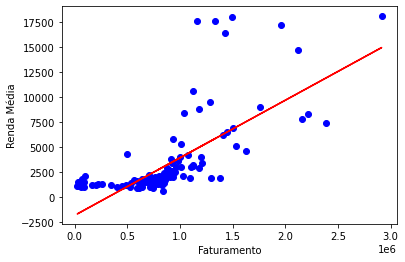

In [24]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, model.coef_[0][0]*x_train + model.intercept_[0], '-r')
plt.ylabel('Renda Média')
plt.xlabel('Faturamento')
plt.show()

### Resultado final... **83%** de acerto do modelo que foi criado
#### Obviamente ainda tem espaço para aumentar essa porcentagem de acerto, mas por hora, acredito que seja um modelo bem assertivo.

In [25]:
print('R2-score: %.2f' % r2_score(predicoesFat, y_test))

R2-score: 0.83


## Esse foi o fim do case. 
### Agradeço desde já pela oportunidade, foi muito legal ter explorado o dataset, espero que eu tenha desempenhado de acordo com o que vocês esperavam.
### Abs 👋🏻